# Analyse exploratoire des donnees Camp Market

Ce carnet se concentre sur l'analyse exploratoire (EDA) des clients de Camp Market. L'objectif est de comprendre la structure du jeu de donnees, mettre en avant les tendances clefs et identifier les axes d'analyse pour les etapes de modelisation.

## Plan d'exploration

1. Charger le jeu de donnees et verifier sa structure.
2. Quantifier les valeurs manquantes et les ordres de grandeur.
3. Visualiser les distributions numeriques majeures.
4. Analyser les categories socio-demographiques et le comportement d'achat.
5. Evaluer les correlations et premieres relations business.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)
sns.set_theme(style="whitegrid", palette="deep")


In [13]:
# Chargement du jeu de donnees
file_path = "Camp_Market.csv"
df = pd.read_csv(file_path, sep=";", parse_dates=["Dt_Customer"])

print(f"Jeu de donnees charge : {df.shape[0]} lignes x {df.shape[1]} colonnes")
df.head()


Jeu de donnees charge : 2240 lignes x 29 colonnes


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [14]:
# Statistiques descriptives des variables numeriques
numeric_summary = df.select_dtypes(include=[np.number]).describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.59e+03,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.97e+03,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.22e+04,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,4.44e-01,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.06e-01,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.91e+01,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,3.04e+02,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,2.63e+01,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,1.67e+02,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,3.75e+01,54.63,0.0,3.00,12.0,50.00,259.0


In [15]:
# Statistiques descriptives des variables categorielle
categorical_summary = (
    df.select_dtypes(include="object")
      .describe()
      .T
)
categorical_summary


,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864


In [16]:
# Valeurs manquantes
missing = (
    df.isna()
      .sum()
      .to_frame(name="missing_count")
      .assign(missing_rate=lambda x: x["missing_count"] / len(df))
      .query("missing_count > 0")
      .sort_values("missing_count", ascending=False)
)
missing


,missing_count,missing_rate
Income,24,0.01


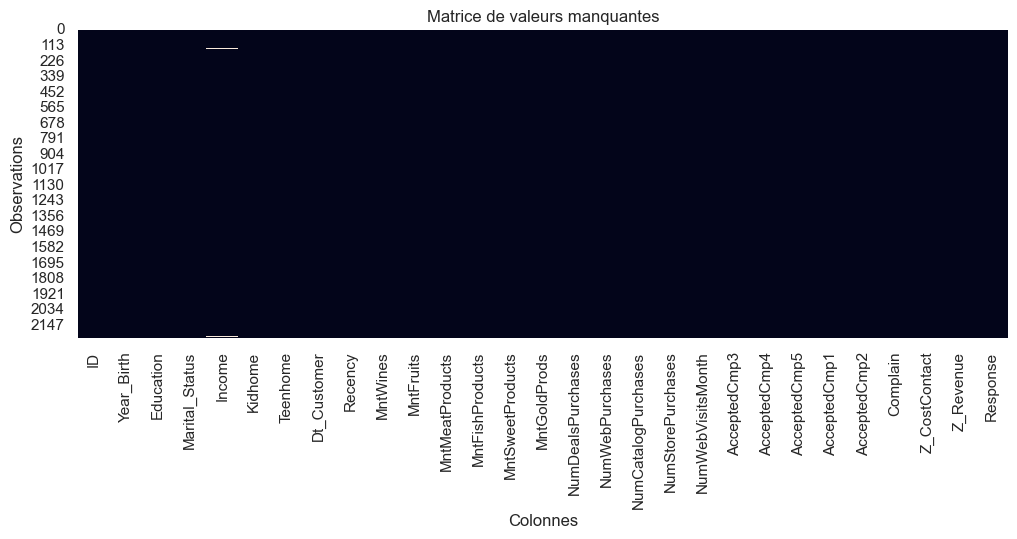

In [ ]:

plt.figure(figsize=(12, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Matrice de valeurs manquantes")
plt.xlabel("Colonnes")
plt.ylabel("Observations")
plt.show()


## Distributions numeriques

Les variables ci-dessous couvrent la capacite d'achat (`Income`), la recence des achats (`Recency`) et les depenses par familles de produits. Les distributions donnent un premier apercu de la variance et des valeurs extremes a surveiller.

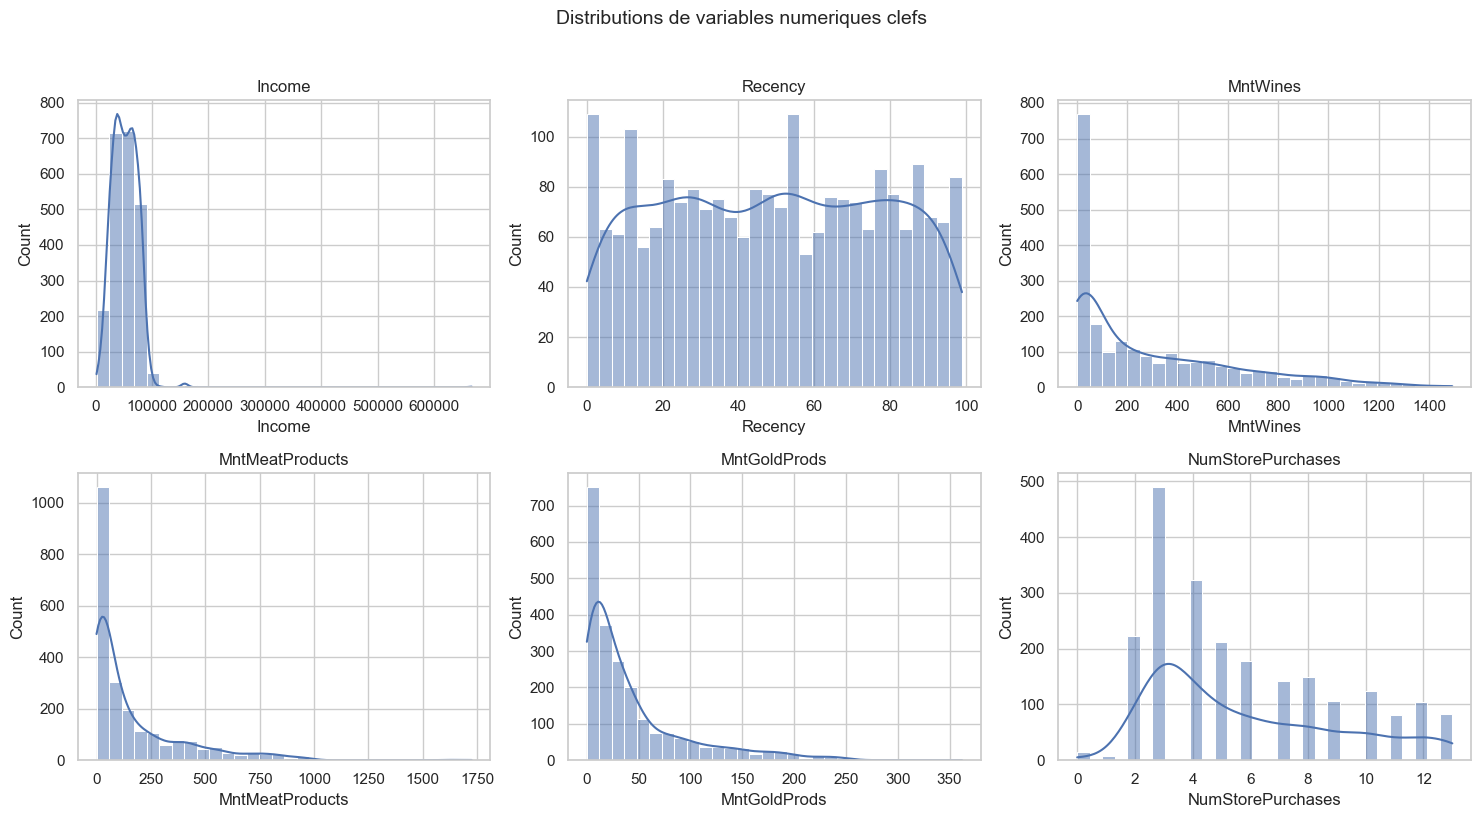

In [18]:
numeric_features = [
    "Income",
    "Recency",
    "MntWines",
    "MntMeatProducts",
    "MntGoldProds",
    "NumStorePurchases",
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for col, ax in zip(numeric_features, axes.flatten()):
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col)

for ax in axes.flatten()[len(numeric_features):]:
    ax.remove()

fig.suptitle("Distributions de variables numeriques clefs", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


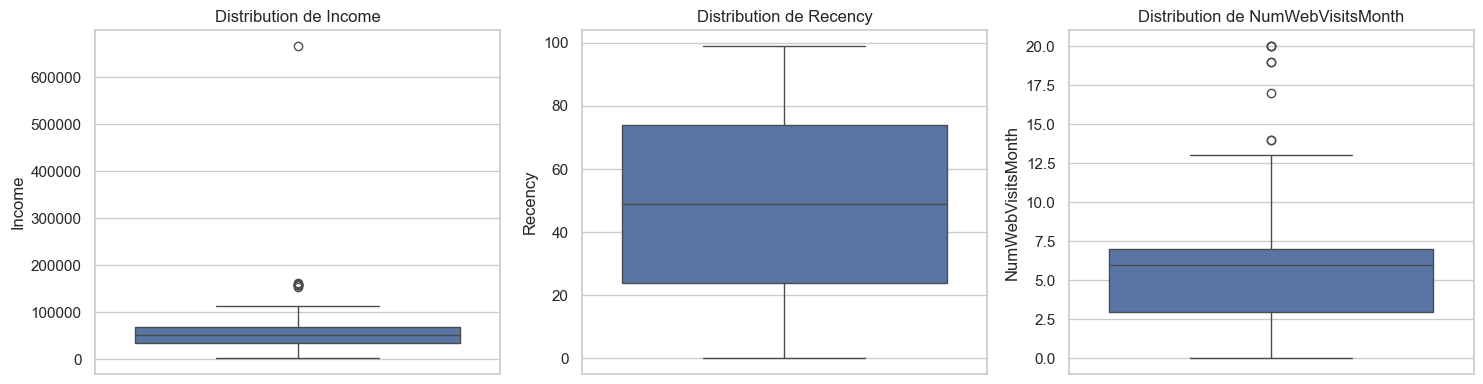

In [19]:
# Boxplots pour identifier les valeurs extremes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
selected_box = ["Income", "Recency", "NumWebVisitsMonth"]
for col, ax in zip(selected_box, axes):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f"Distribution de {col}")
plt.tight_layout()
plt.show()


Depense totale cumulee par categorie de produits:
MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


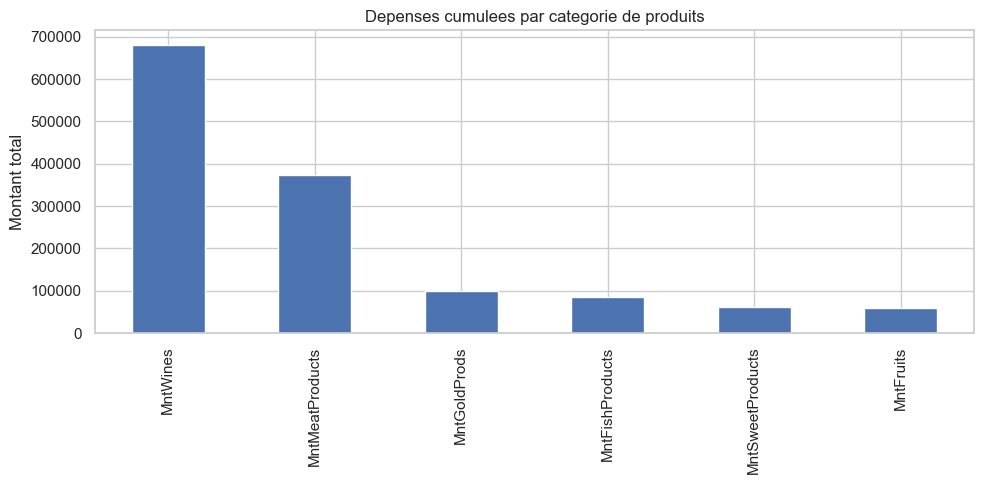

In [20]:
# Depenses totales par famille de produits
spending_cols = [col for col in df.columns if col.startswith("Mnt")]
spending_totals = df[spending_cols].sum().sort_values(ascending=False)

print("Depense totale cumulee par categorie de produits:")
print(spending_totals)

plt.figure(figsize=(10, 5))
spending_totals.plot(kind="bar")
plt.title("Depenses cumulees par categorie de produits")
plt.ylabel("Montant total")
plt.tight_layout()
plt.show()


Nombre moyen d'achats par canal:
NumStorePurchases      5.79
NumWebPurchases        4.08
NumCatalogPurchases    2.66
NumDealsPurchases      2.33
dtype: float64


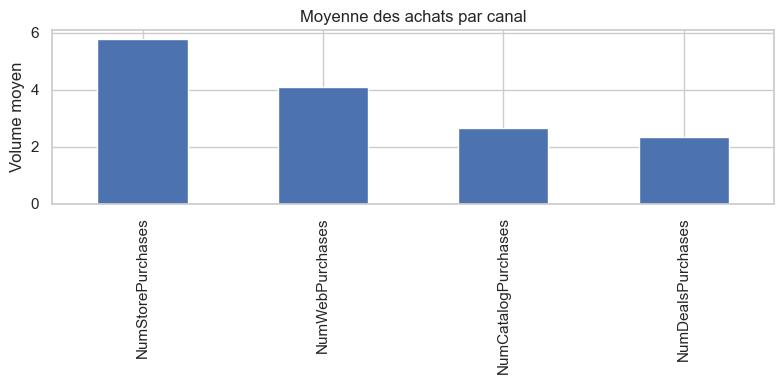

In [21]:
# Analyse des canaux d'achat
channel_cols = [
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumDealsPurchases",
]

channel_means = df[channel_cols].mean().sort_values(ascending=False)
print("Nombre moyen d'achats par canal:")
print(channel_means)

plt.figure(figsize=(8, 4))
channel_means.plot(kind="bar")
plt.title("Moyenne des achats par canal")
plt.ylabel("Volume moyen")
plt.tight_layout()
plt.show()


## Profils categoriels

Les graphiques suivants comparent la repartition des categories sociodemographiques et la participation aux campagnes.

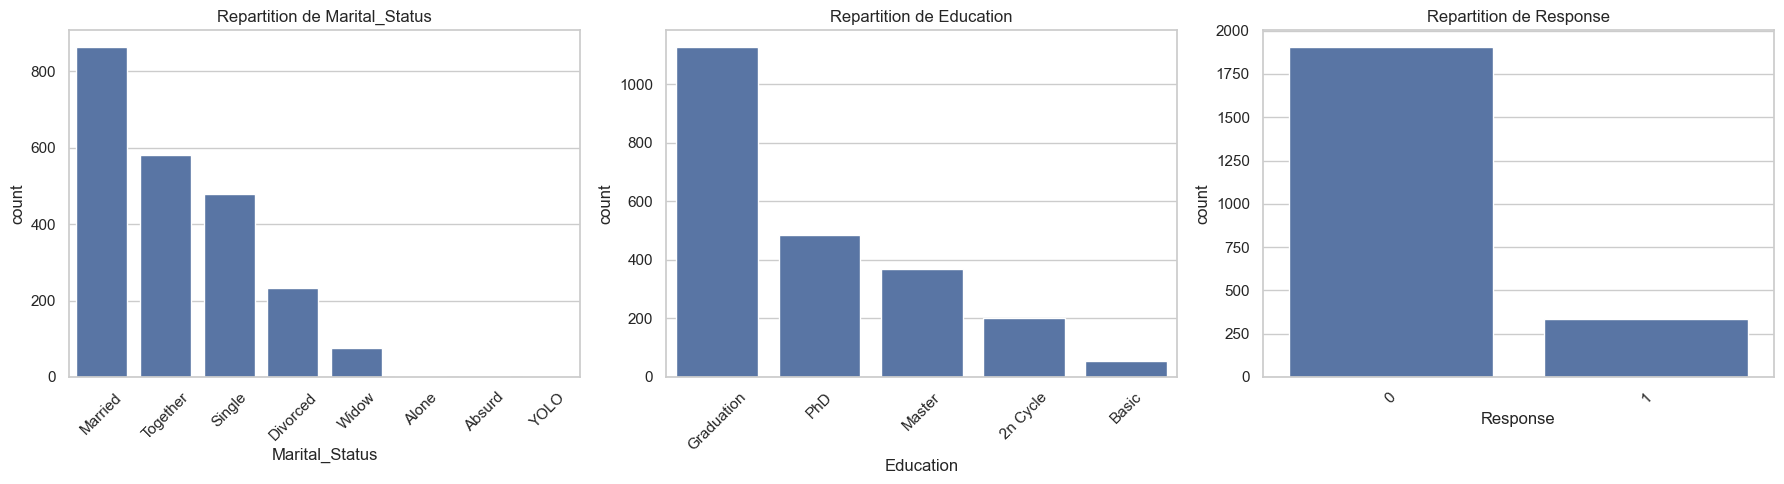

In [22]:
categorical_cols = ["Marital_Status", "Education", "Response"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for col, ax in zip(categorical_cols, axes):
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, ax=ax)
    ax.set_title(f"Repartition de {col}")
    ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Taux d'acceptation des campagnes
campaign_cols = [col for col in df.columns if col.startswith("AcceptedCmp")]
campaign_cols += ["Response"]

acceptance_rate = df[campaign_cols].mean().sort_values(ascending=False)
acceptance_rate.to_frame(name="taux_acceptation")


,taux_acceptation
Response,0.15
AcceptedCmp4,0.07
AcceptedCmp3,0.07
AcceptedCmp5,0.07
AcceptedCmp1,0.06
AcceptedCmp2,0.01


In [24]:
# Profil des repondants vs non-repondants
spending_cols = [col for col in df.columns if col.startswith("Mnt")]
df_profiles = df.assign(TotalSpend=df[spending_cols].sum(axis=1))

response_profile = (
    df_profiles.groupby("Response")
      .agg(
          clients=("ID", "count"),
          revenu_median=("Income", "median"),
          depense_totale_mediane=("TotalSpend", "median"),
          recence_moyenne=("Recency", "mean"),
          visites_web_moyennes=("NumWebVisitsMonth", "mean")
      )
      .rename(index={0: "Non", 1: "Oui"})
)
response_profile


,clients,revenu_median,depense_totale_mediane,recence_moyenne,visites_web_moyennes
Response,,,,,
Non,1906,50150.0,314.0,51.51,5.32
Oui,334,64090.0,1057.5,35.38,5.29


## Relations et correlations

Nous examinons les dependances entre les variables numeriques pour identifier des groupes co-varients, utiles pour la segmentation.

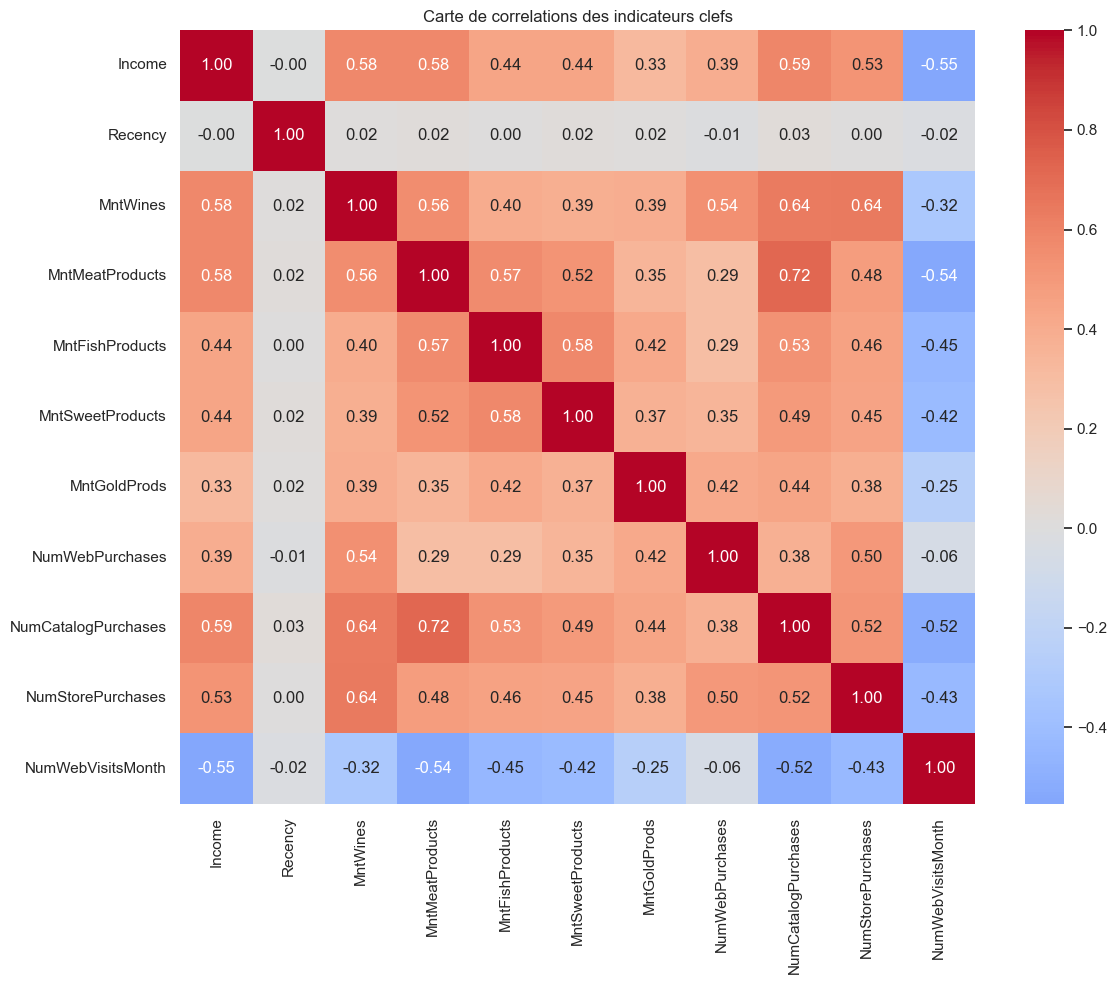

In [ ]:
cols_for_corr = [
    "Income",
    "Recency",
    "MntWines",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

corr_matrix = df[cols_for_corr].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Carte de correlations des indicateurs clefs")
plt.tight_layout()
plt.show()


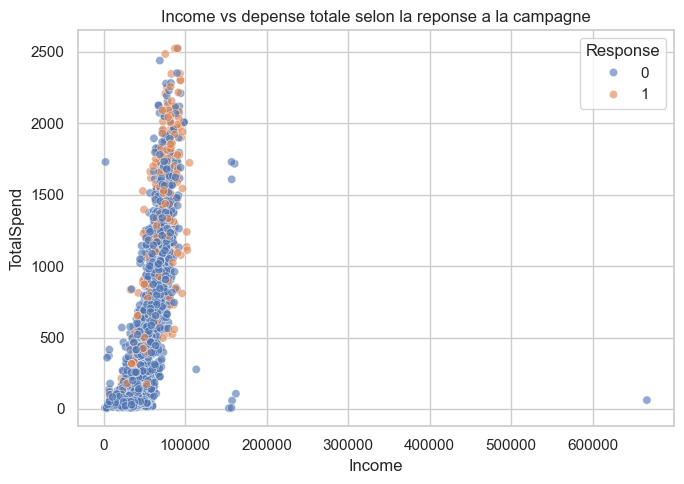

In [26]:
# Relation revenu vs depense totale
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_profiles,
    x="Income",
    y="TotalSpend",
    hue="Response",
    alpha=0.6
)
plt.title("Income vs depense totale selon la reponse a la campagne")
plt.tight_layout()
plt.show()


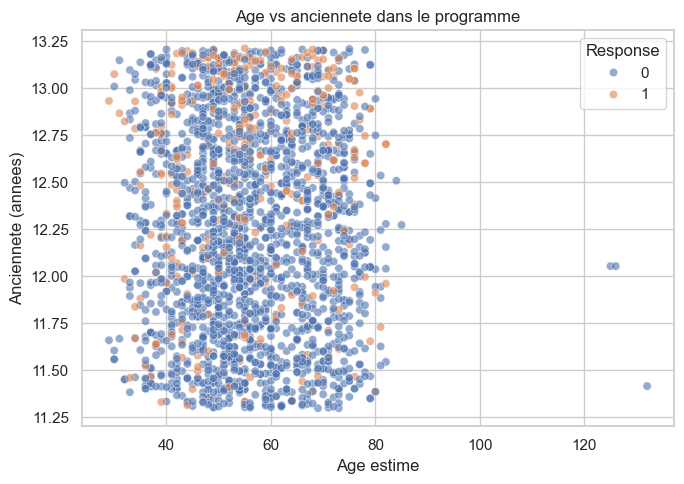

In [ ]:
current_year = pd.Timestamp.today().year
age = current_year - df["Year_Birth"]
anciennete = (pd.Timestamp.today() - df["Dt_Customer"]).dt.days / 365.25

plt.figure(figsize=(7, 5))
sns.scatterplot(x=age, y=anciennete, hue=df["Response"], alpha=0.6)
plt.title("Age vs anciennete dans le programme")
plt.xlabel("Age estime")
plt.ylabel("Anciennete (annees)")
plt.tight_layout()
plt.show()


## Points clefs a approfondir

- Les depenses sont fortement portees par les produits vins et viandes : a confirmer apres nettoyage.
- Le canal magasin domine en volume, mais les repondants semblent aussi plus actifs sur le web (a valider).
- La correlation entre depenses et income devra etre controlee et normalisee avant la modelisation.
- Explorer des segments education x statut marital permettra de cibler les campagnes futures.
- Une etude temporelle de `Dt_Customer` (cohorte, retours) pourrait enrichir l'analyse business.